In [36]:
import numpy as np
from math import sin, cos, pi, sqrt, factorial, fabs

In [37]:
Lmax = 10

In [38]:
rand = np.random.normal(size = (Lmax+1, 2*Lmax+1))

In [39]:
# initial algorithm
teta = pi
phi = 0.3

P = np.zeros((Lmax+1, Lmax+1))
P_ = np.zeros((Lmax+1, Lmax+1))

# Diagonal
P_[0][0] = 1/sqrt(4*pi)
for m in xrange(1, Lmax+1):
    P_[m][m] = P_[m-1][m-1]*(- sin(teta))*sqrt(2*m+3)/sqrt(2*m+2)
    
# Back to P
for m in xrange(0, Lmax+1):
    P[m][m] = P_[m][m]*sqrt(4*pi*factorial(2*m))/sqrt(2*m+1)

# Above the diagonal for P_
for m in xrange(0, Lmax):
    P_[m][m+1] = P[m][m]*cos(teta)*(2*m+1)*sqrt(2*m+3)/sqrt(4*pi*factorial(2*m+1))
    
# Back to P again
for m in xrange(0, Lmax):
    P[m][m+1] = P_[m][m+1]*sqrt(4*pi*factorial(2*m+1))/sqrt(2*m+3)

# Recursive
for m in xrange(0, Lmax-1):
    for l in xrange(m+2, Lmax+1):
        P[m][l] = (cos(teta)*(2*l-1)*P[m][l-1] - (l+m-1)*P[m][l-2])/(l-m)
        
# Generating for function
f = 0.0

for l in xrange(0, Lmax+1):
    for m in xrange(-l, 0):
        f = f + sin(m*phi)*rand[l][m]*P[fabs(m)][l]
for l in xrange(0, Lmax+1):
    for m in xrange(0, l+1):
        f = f + cos(m*phi)*rand[l][m]*P[fabs(m)][l]

/Users/heyfaraday/anaconda/envs/new2/lib/python2.7/site-packages/ipykernel/__main__.py:35: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/heyfaraday/anaconda/envs/new2/lib/python2.7/site-packages/ipykernel/__main__.py:38: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [40]:
f

1.8614572011650146

In [41]:
N = 200

In [42]:
field = np.zeros((N, N/2+1))
x = np.zeros((N, N/2+1))
y = np.zeros((N, N/2+1)) 

In [43]:
mu, sigma = 1.0, 1.0
rand = np.random.normal(mu, sigma, size = (Lmax+1, 2*Lmax+1))

In [44]:
for i in xrange(0, N):
    for j in xrange(-N/4, N/4+1):
        
        phi = i*2/float(N)*pi
        teta = pi/2*j*4/float(N)
        
        P = np.zeros((Lmax+1, Lmax+1))
        P_ = np.zeros((Lmax+1, Lmax+1))
        
        P_[0][0] = 1/sqrt(4*pi)
        
        for m in xrange(1, Lmax+1):
            P_[m][m] = P_[m-1][m-1]*(-sin(teta))*sqrt(2*m+3)/sqrt(2*m+2)
        
        for m in xrange(0, Lmax+1):
            P[m][m] = P_[m][m]*sqrt(4*pi*factorial(2*m))/sqrt(2*m+1)
        
        for m in xrange(0, Lmax):
            P_[m][m+1] = P[m][m]*cos(teta)*(2*m+1)*sqrt(2*m+3)/sqrt(4*pi*factorial(2*m+1))
        
        for m in xrange(0, Lmax):
            P[m][m+1] = P_[m][m+1]*sqrt(4*pi*factorial(2*m+1))/sqrt(2*m+3)
            
        for m in xrange(0, Lmax-1):
            for l in xrange(m+2, Lmax+1):
                P[m][l] = (cos(teta)*(2*l-1)*P[m][l-1] - (l+m-1)*P[m][l-2])/float(l-m)
 
        f = 0.0
        
        for l in xrange(0, Lmax+1):
            for m in xrange(-l, 0):
                f = f + sin(m*phi)*rand[l][m]*P[fabs(m)][l]
                #f = f + rand[l][m]*P[fabs(m)][l]
                #f = f + P[fabs(m)][l]
        for l in xrange(0, Lmax+1):
            for m in xrange(0, l+1):
                f = f + cos(m*phi)*rand[l][m]*P[fabs(m)][l]
                #f = f + rand[l][m]*P[fabs(m)][l]
                #f = f + P[fabs(m)][l]
                
        field[i][j + N/4] = f
        
        x[i][j + N/4] = (i-N/2)*2/float(N)*pi
        y[i][j + N/4] = teta

/Users/heyfaraday/anaconda/envs/new2/lib/python2.7/site-packages/ipykernel/__main__.py:32: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/heyfaraday/anaconda/envs/new2/lib/python2.7/site-packages/ipykernel/__main__.py:37: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


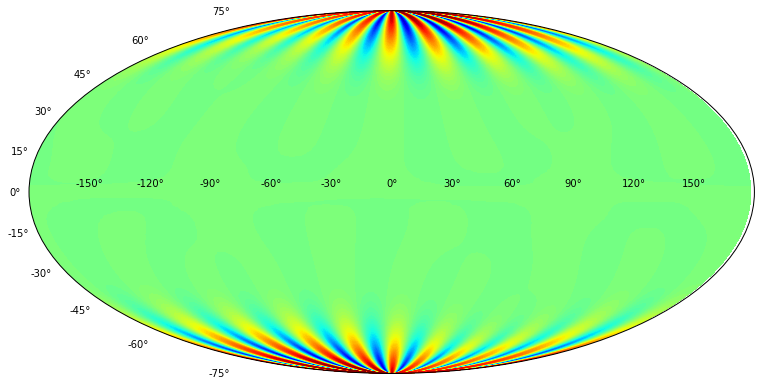

In [45]:
import pylab as plt
plt.figure(figsize=(13,10))

ax = plt.subplot(111, projection = 'mollweide')
ax.contourf(x,y,field,100)
#ax.contour(x,y,field,10,colors='k')
plt.show()

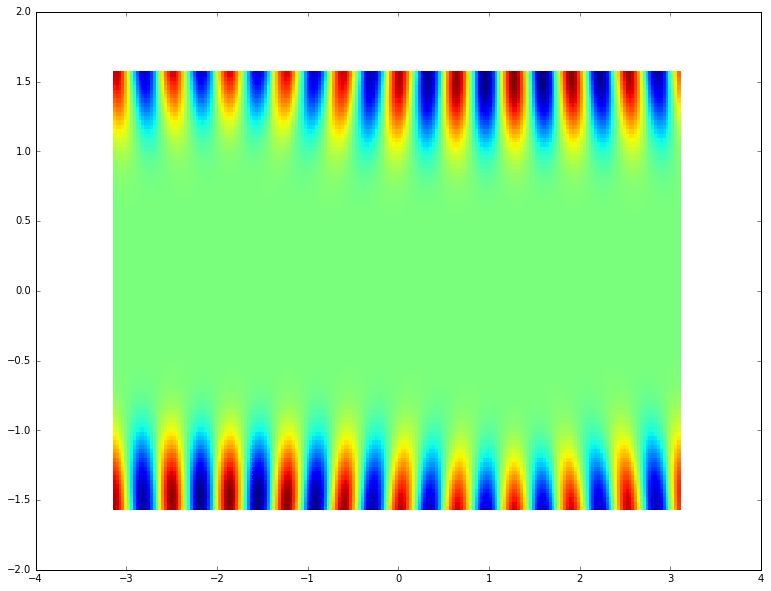

In [46]:
plt.figure(figsize=(13,10))
ax = plt.pcolormesh(x, y, field)
plt.show()

In [77]:
for i in xrange(0, N):
    for j in xrange(-N/4, N/4+1):
        
        phi = i*2/float(N)*pi
        teta = pi/2*(j+N/4)*4/float(N)
        
        
        P = np.zeros((Lmax+1, Lmax+1))
        P_ = np.zeros((Lmax+1, Lmax+1))
        
        P_[0][0] = 1/sqrt(4*pi)
        
        for m in xrange(1, Lmax+1):
            P_[m][m] = P_[m-1][m-1]*(-sin(teta))*sqrt(2*m+3)/sqrt(2*m+2)
        
        for m in xrange(0, Lmax):
            P_[m][m+1] = P_[m][m]*cos(teta)*sqrt(2*m+3)
            
        for m in xrange(0, Lmax-1):
            for l in xrange(m+2, Lmax+1):
                P_[m][l] = sqrt((2*l+1)*(l-1-m))/sqrt(l**2-m**2)*(cos(teta)*sqrt(2*l-1)/sqrt(l-1-m)*P_[m][l-1] - sqrt(l+m-1)/sqrt(2*l-3)*P_[m][l-2])
        
        for m in xrange(0, Lmax+1):
            for l in xrange(m, Lmax+1):     
                P[m][l] = sqrt(4*pi*factorial(l+m))/sqrt((2*l+1)*factorial(l-m))*P_[m][l]
 
        f = 0.0
        
        m = 3
        l = 3
        
        f = cos(m*phi)*P[fabs(m)][l]
                
        field[i][j + N/4] = f
        
        x[i][j + N/4] = (i-N/2)*2/float(N)*pi
        y[i][j + N/4] = teta - pi/2*(N/4)*4/float(N)

/Users/heyfaraday/anaconda/envs/new2/lib/python2.7/site-packages/ipykernel/__main__.py:32: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


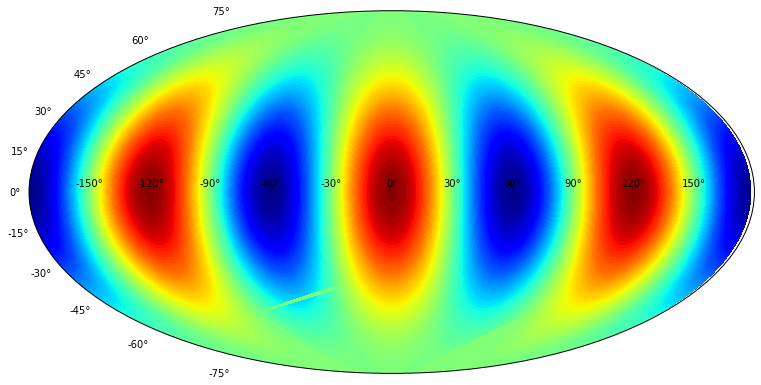

In [78]:
import pylab as plt
plt.figure(figsize=(13,10))

ax = plt.subplot(111, projection = 'mollweide')
ax.contourf(x,y,field,100)
#ax.contour(x,y,field,10,colors='k')
plt.show()

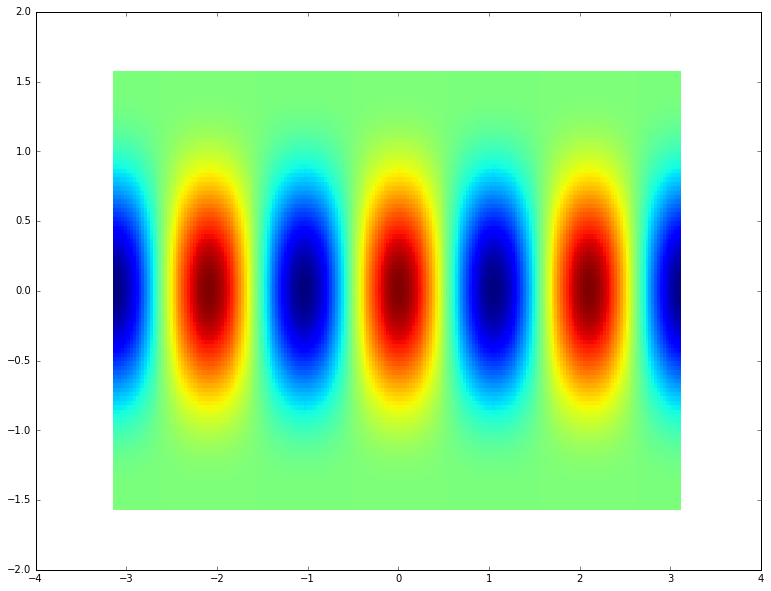

In [79]:
plt.figure(figsize=(13,10))
ax = plt.pcolormesh(x, y, field)
plt.show()

По версии numerical recipies - это работает правильно - http://www.wikiwand.com/ru/Сферические_функции

На полюсах должны быть большие значения чем на экваторе -  http://www.wikiwand.com/en/Table_of_spherical_harmonics

http://www.wikiwand.com/en/Spherical_harmonics